### Loading data

In [2]:
import numpy as np
import pandas as pd

spotify_data = pd.read_csv('dataset-of-90s.csv')
incols = ["danceability","energy","loudness","tempo",
          "speechiness","acousticness","instrumentalness",
         "liveness","valence"] 
spotify_data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


### Standartization

1. Find two features in your dataset with more or less “linear-like” scatterplot.

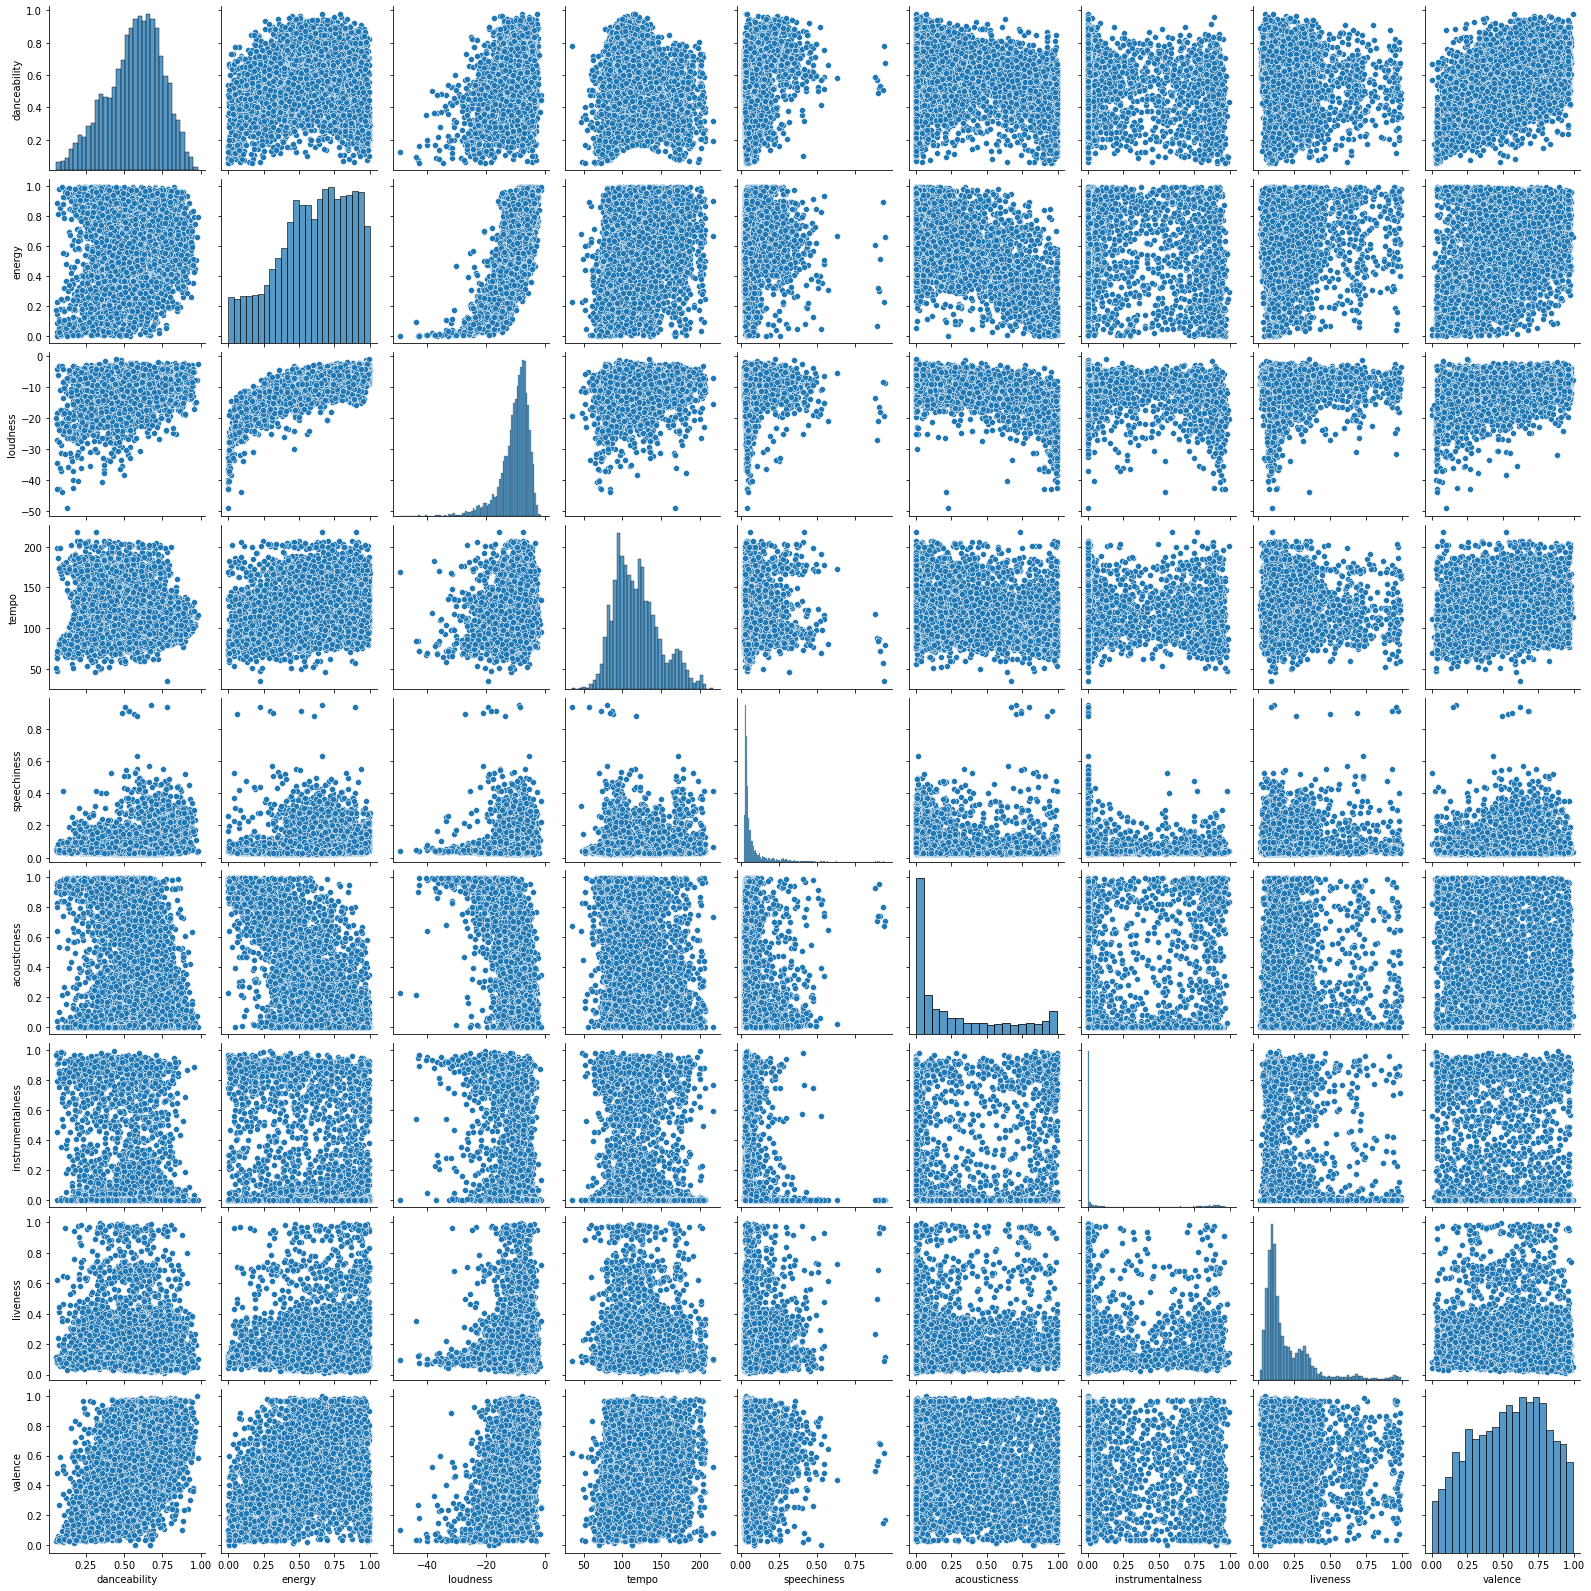

In [3]:
import seaborn as sns

sns.pairplot(spotify_data[incols])

As we can see, there is no fully "linear-like" scatterplot, but in my opinion we can take scatterplot of "loudness" and "energy" features. It seems logical, because if song goes louder, than it should be more energetic. Let's show only this scatterplot.

2. Display the scatter-plot and comment how well it is suitable for building a linear regression

<AxesSubplot:xlabel='energy', ylabel='loudness'>

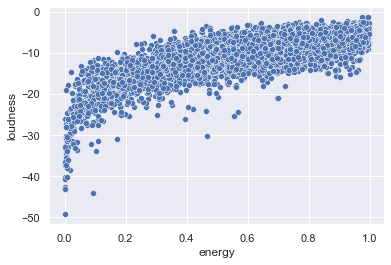

In [4]:
sns.set_theme()
sns.scatterplot(data=spotify_data, x="energy", y="loudness")

For study reasons let's clear the area above -30 dB of "Loudness" feature to get "linear-like" scatter-plot.

In [5]:
spotify_data_cut = spotify_data.copy()[spotify_data['loudness']>=-30]

<AxesSubplot:xlabel='energy', ylabel='loudness'>

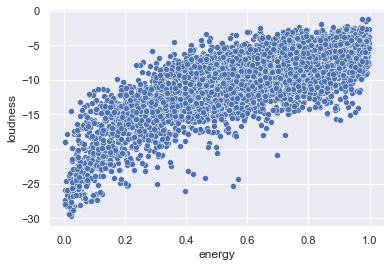

In [8]:
import seaborn as sns
sns.set_theme()
sns.scatterplot(data=spotify_data_cut, x="energy", y="loudness")

It still has some kind of non-linear relationship. But let's try build linear regression on this scatterplot.

In [13]:
# standartize data
df_z_std = spotify_data_cut.copy()
for col in incols:
    df_z_std[col] = (spotify_data[col] - spotify_data[col].mean())/spotify_data[col].std()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5.472000e+03,5472.000000,5472.000000,5472.000000,5472.000000
mean,0.013350,0.019892,5.256031,0.042302,0.669408,0.000628,-0.016323,-0.012664,0.003119,0.011827,0.005746,2.560408e+05,3.925073,40.983186,11.110563,0.504386
std,0.990807,0.981093,3.511276,0.892550,0.470469,1.002380,0.987195,0.988393,1.000465,0.993922,0.996697,1.026377e+05,0.348189,19.796595,4.446109,0.500026
min,-2.823553,-2.377367,0.000000,-3.815777,0.000000,-0.634265,-0.897081,-0.525238,-1.055158,-2.086574,-2.858830,1.953300e+04,1.000000,0.000000,1.000000,0.000000
25%,-0.625886,-0.639387,2.000000,-0.364732,0.000000,-0.498863,-0.842249,-0.525238,-0.614225,-0.790434,-0.750969,2.030570e+05,4.000000,28.074175,9.000000,0.000000
50%,0.117018,0.139790,5.000000,0.233550,1.000000,-0.376880,-0.478143,-0.524548,-0.396407,0.078834,-0.128162,2.471065e+05,4.000000,36.525285,11.000000,1.000000
75%,0.737953,0.835696,8.000000,0.657468,1.000000,-0.013371,0.674707,-0.261939,0.359724,0.831681,0.582507,2.898168e+05,4.000000,48.680355,13.000000,1.000000
max,2.284747,1.569272,11.000000,1.771713,1.000000,10.685754,2.167943,2.749982,4.552818,1.778562,3.360608,1.711800e+06,5.000000,224.076630,69.000000,1.000000


 3. Build a linear regression of one of the features over the other. Make a comment on the meaning of the slope.


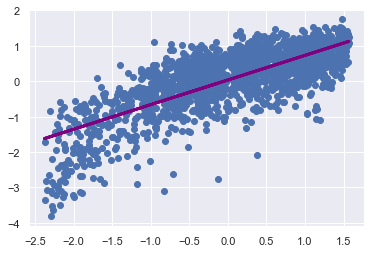

In [11]:
# using sklearn realization
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df_z_std['energy'].to_numpy()
X = np.reshape(X, (5472, 1))
y = df_z_std['loudness'].to_numpy()
y = np.reshape(y, (5472, 1))
regr = LinearRegression()

#train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,random_state=42)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='purple', linewidth=3)

Meaning of the slope:
If music gets louder, than it has more energy. It is very common for some party genre songs.

4. Find the correlation and determinacy coefficients, and comment on the meaning of the latter.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, matthews_corrcoef

print('Coef: \n',regr.coef_)

print('Intercept: \n',regr.intercept_)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coef: 
 [[0.69489014]]
Intercept: 
 [0.03227476]
Mean squared error: 0.35
Coefficient of determination: 0.57


In [45]:
print('Correlation coefficient: ')
df_z_std[['energy','loudness']].corr()

Correlation coefficient: 


,energy,loudness
energy,1.00000,0.76412
loudness,0.76412,1.00000


So, correlation coefficient is **0.76**  
Determination coefficient is **0.57**  
What does it say about our features?
 - Correlation coefficient is a measure of degree of a linear relation between x and y. The closer it is to 1 or -1 the more linearly dependent are features.
 - Determinacy coefficient is the proportion of the variance $\sigma^{2}(y)$ taken into account by the linear regression of y over x.

These features are highly correlated and their relation is indeed strong. 
Determination coefficient shows us, that 57% of the our data fit the linear regression model. In my opinion, if we used non-linear model, it would show us greater determination coefficient.

5. Make a prediction of the target values for given two or three predictor’ values; make a comment

In [19]:
np.random.seed(100)
indices =  np.random.choice(range(0, X_test.shape[0]), 3)
print(indices)

y_pred_3 = regr.predict(X_test[indices])
y_true_3 = y_test[indices]
print("predicted: \n",
      y_pred_3)
print("True: \n",
      y_true_3)
print("difference: ", abs(y_pred_3 - y_true_3))

[1544  792   79]
predicted: 
 [[ 0.58819301]
 [-0.78125647]
 [-0.46438184]]
True: 
 [[ 0.73519726]
 [-0.98646562]
 [-0.69313804]]
difference:  [[0.14700425]
 [0.20520915]
 [0.22875619]]


This prediction is barely close. There is difference between every pair of values appr. **0.2**.  
Let's check errors.

6. Compare the mean relative absolute error of the regression on all points of your set and the determinacy coefficient and make comments

In [23]:
from sklearn.metrics import mean_absolute_error

print("mean relative absolute error : %.3f" 
      % mean_absolute_error(y_test, y_pred))
print("determinacy coefficient: %.3f" 
      % r2_score(y_test, y_pred))

mean relative absolute error : 0.459
determinacy coefficient: 0.567


The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or $l1$-norm loss.

MRAE shows 45.9%. It is a great value. It can't be acceptable and for reducing this value I would offer another type of regression, as I said non-linear regression, maybe logarithmic regression $y = a + b ln(x)$

[3.02634986 1.26775906]


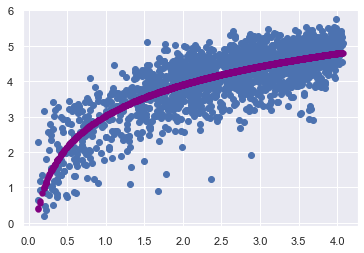

In [28]:
from scipy.optimize import curve_fit

X_moved = df_z_std['energy'].to_numpy()+2.5
y_moved = df_z_std['loudness'].to_numpy()+4

X_train, X_test, y_train, y_test = train_test_split(
    X_moved,y_moved,test_size=0.3,random_state=42)

plt.scatter(X_test, y_test)
curve_coef, _ = curve_fit(lambda t,a,b: a+b*np.log(t),  X_train,  y_train)
print(curve_coef)
y_log = curve_coef[0]+curve_coef[1]*np.log(X_test)
plt.scatter(X_test, y_log,color='purple', linewidth=0.3)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, matthews_corrcoef

print('Mean squared error: %.3f'
      % mean_squared_error(y_test, y_log))

print('Coefficient of determination: %.3f'
      % r2_score(y_test, y_log))

Mean squared error: 0.305
Coefficient of determination: 0.625


In [42]:
print("mean relative absolute error : %.3f" 
      % mean_absolute_error(y_test, y_log))
print("determinacy coefficient: %.3f" 
      % r2_score(y_test, y_log))

mean relative absolute error : 0.426
determinacy coefficient: 0.625


In comparison to linear model, we have:  
1. Mean Squared Error  
    1.1 Linear: 0.35  
    1.2 Non-Linear: **0.305**  
2. Coefficient of determination  
    2.1 Linear: 0.57  
    2.2 Non-Linear: **0.63**  
3. Mean Relative Absolute Error  
    3.1 Linear: 0.459  
    3.2 Non_linear: **0.426**    
    
Despite the fact, that building of the non-linear model was not a task, I thought, that we can get more precise results with non-linear log model. So it's true.